In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sklearn
print(sklearn.__version__)

1.2.2


In [5]:
df  = pd.read_csv('me_cfs_vs_depression.csv')
df.head()

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,NaN,24.0,1.6,13.0,6.9,0,Partially working,NaN,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,No,Both


In [6]:
df.shape

(1000, 16)

In [7]:
df.columns

Index(['age', 'gender', 'sleep_quality_index', 'brain_fog_level',
       'physical_pain_score', 'stress_level', 'depression_phq9_score',
       'fatigue_severity_scale_score', 'pem_duration_hours',
       'hours_of_sleep_per_night', 'pem_present', 'work_status',
       'social_activity_level', 'exercise_frequency',
       'meditation_or_mindfulness', 'diagnosis'],
      dtype='object')

In [8]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

sleep_quality_index             47
brain_fog_level                 48
physical_pain_score             34
stress_level                    48
depression_phq9_score           22
fatigue_severity_scale_score    21
pem_duration_hours              24
hours_of_sleep_per_night        21
work_status                     47
social_activity_level           40
exercise_frequency              39
meditation_or_mindfulness       11
dtype: int64

In [9]:
df['meditation_or_mindfulness'].value_counts()

meditation_or_mindfulness
Yes    505
No     484
Name: count, dtype: int64

In [10]:
cat_null = [i for i in df.columns if df[i].dtypes=='object' and df[i].isnull().sum()>0]
print(cat_null)
num_null = [i for i in df.columns if df[i].dtypes!='object' and df[i].isnull().sum()>0]
print(num_null)

# df[col].fillna(value,inplace=True)

# df[col] =  df[col].fillna(value)

['work_status', 'social_activity_level', 'exercise_frequency', 'meditation_or_mindfulness']
['sleep_quality_index', 'brain_fog_level', 'physical_pain_score', 'stress_level', 'depression_phq9_score', 'fatigue_severity_scale_score', 'pem_duration_hours', 'hours_of_sleep_per_night']


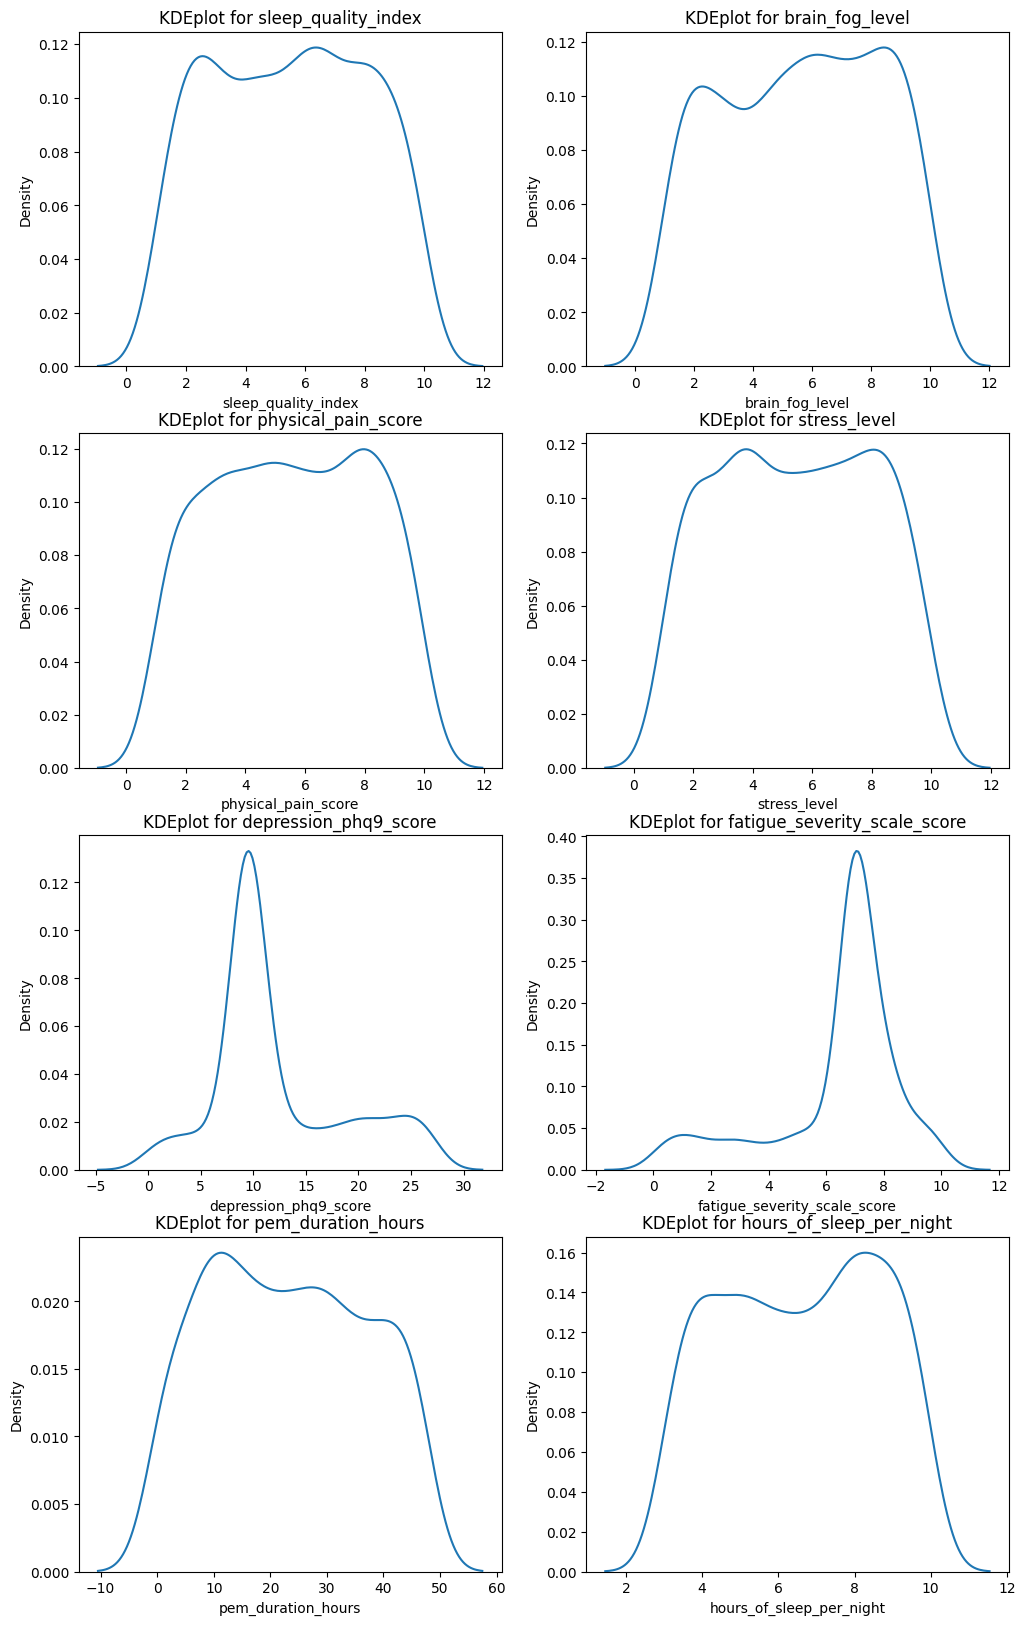

In [11]:
plt.figure(figsize=(12,20))
for i in range(len(num_null)):
  plt.subplot(4,2,i+1)
  sns.kdeplot(x=df[num_null[i]])
  plt.title(f'KDEplot for {num_null[i]}')
plt.show()

In [12]:
for i in num_null:
  if i not in  ['depression_phq9_score','fatigue_severity_scale_score']:
    df[i] = df[i].fillna(df[i].mean())
  else:
    df[i] = df[i].fillna(df[i].median())

In [13]:
# df[num_null].isnull().sum()
for i in cat_null:
  print(df[i].value_counts(dropna=False))
  feat_top2 = df[i].value_counts().head().index


  print('*'*50)

work_status
Partially working    335
Working              320
Not working          298
NaN                   47
Name: count, dtype: int64
**************************************************
social_activity_level
Very low     203
High         200
Low          190
Very high    186
Medium       181
NaN           40
Name: count, dtype: int64
**************************************************
exercise_frequency
Rarely       210
Often        202
Daily        194
Sometimes    184
Never        171
NaN           39
Name: count, dtype: int64
**************************************************
meditation_or_mindfulness
Yes    505
No     484
NaN     11
Name: count, dtype: int64
**************************************************


In [14]:
feat_top2 = df['work_status'].value_counts().head(2).index
feat_random_fill_val = np.random.choice(feat_top2,size=df['work_status'].isnull().sum())
null_val_index = df[df['work_status'].isnull()].index
# print(len(null_val_index))
df.loc[null_val_index,'work_status'] = feat_random_fill_val

In [15]:
for i in cat_null:
  feat_top2 = df[i].value_counts().head(2).index
  feat_random_fill_val = np.random.choice(feat_top2,size=df[i].isnull().sum())
  null_val_index = df[df[i].isnull()].index
  df.loc[null_val_index,i]  = feat_random_fill_val


In [16]:
df.isnull().sum()

age                             0
gender                          0
sleep_quality_index             0
brain_fog_level                 0
physical_pain_score             0
stress_level                    0
depression_phq9_score           0
fatigue_severity_scale_score    0
pem_duration_hours              0
hours_of_sleep_per_night        0
pem_present                     0
work_status                     0
social_activity_level           0
exercise_frequency              0
meditation_or_mindfulness       0
diagnosis                       0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)
len(num_cols)

Index(['gender', 'work_status', 'social_activity_level', 'exercise_frequency',
       'meditation_or_mindfulness', 'diagnosis'],
      dtype='object')
Index(['age', 'sleep_quality_index', 'brain_fog_level', 'physical_pain_score',
       'stress_level', 'depression_phq9_score', 'fatigue_severity_scale_score',
       'pem_duration_hours', 'hours_of_sleep_per_night', 'pem_present'],
      dtype='object')


10

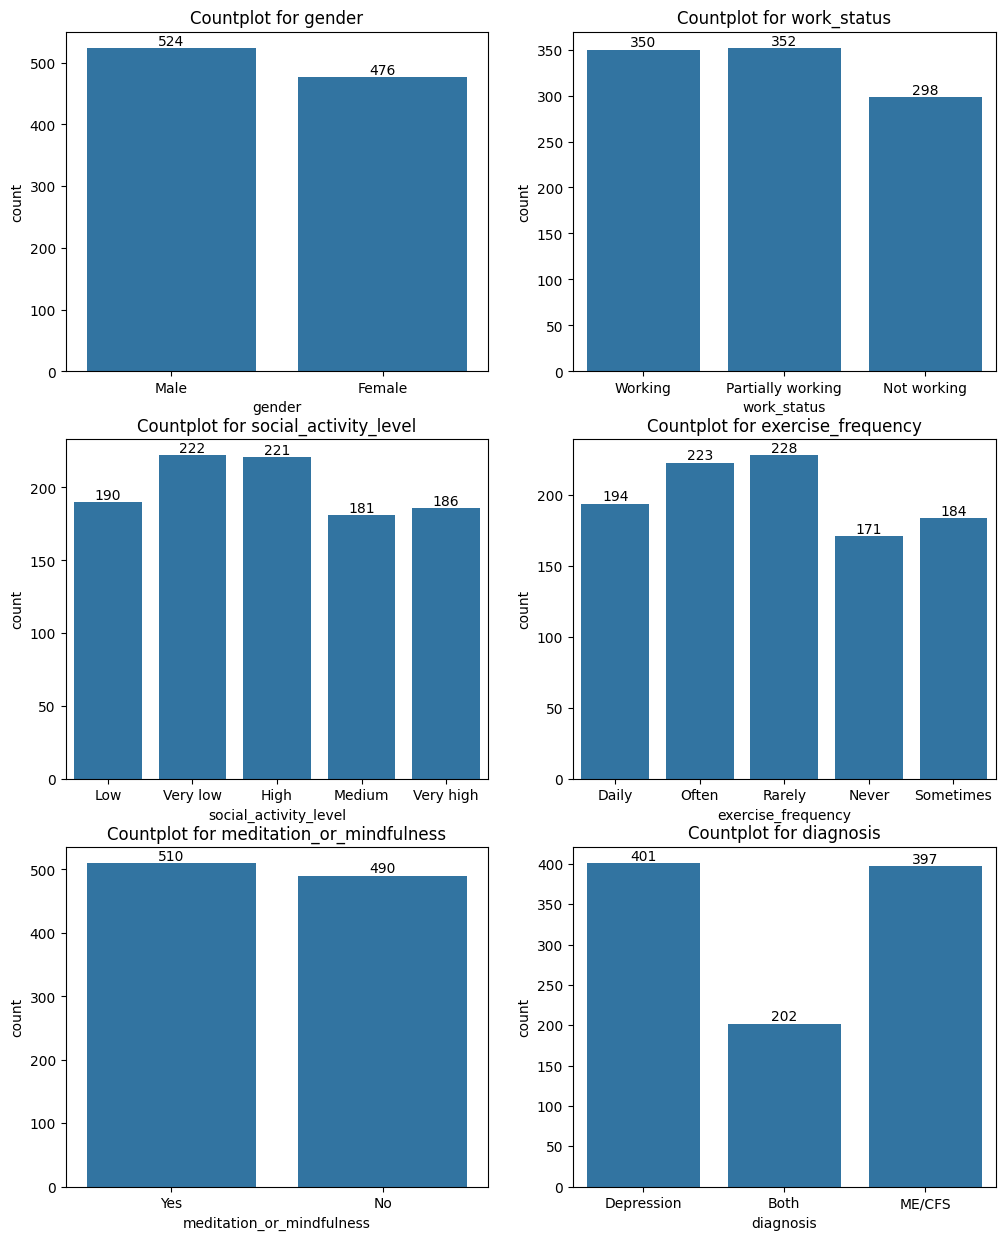

In [19]:
plt.figure(figsize=(12,15))
for i in range(len(cat_cols)):
  plt.subplot(3,2,i+1)
  ax = sns.countplot(x=df[cat_cols[i]])
  ax.bar_label(ax.containers[0])
  plt.title(f'Countplot for {cat_cols[i]}')
plt.show()

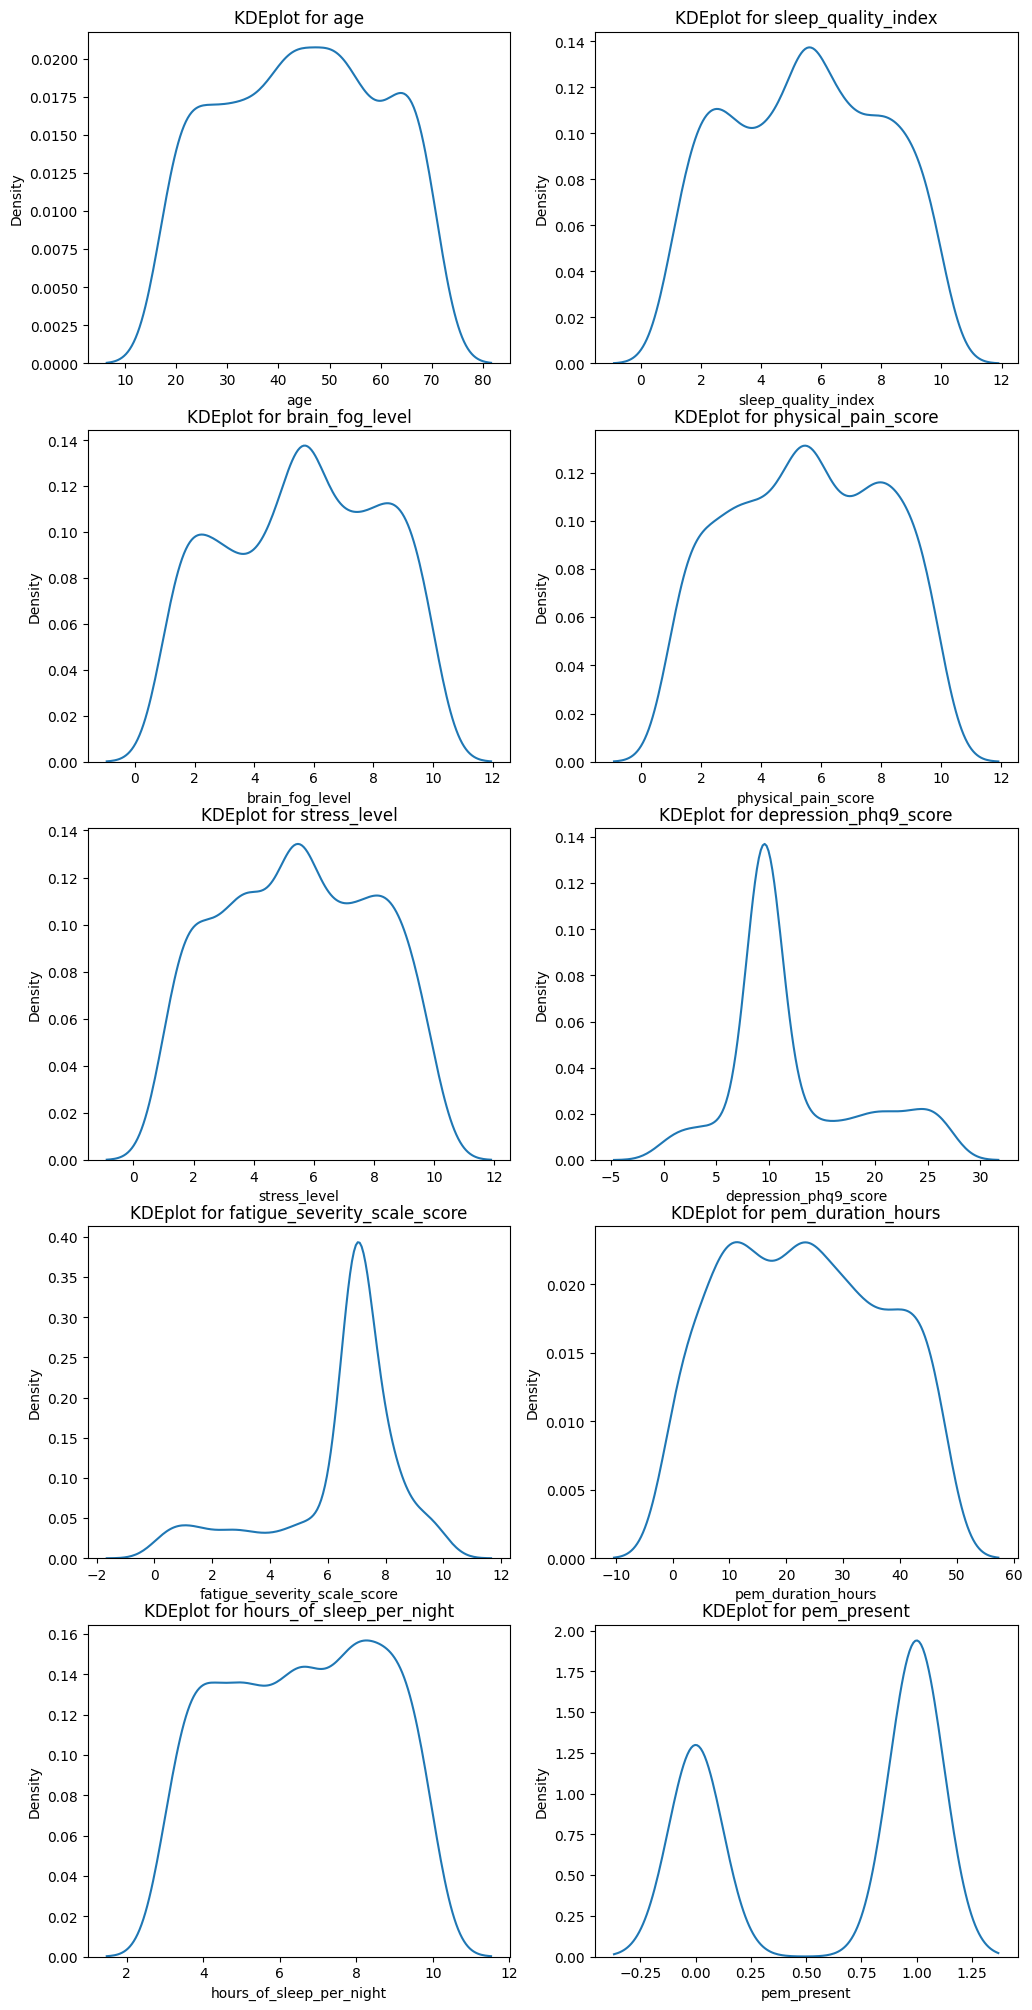

In [20]:
plt.figure(figsize=(12,25))
for i in range(len(num_cols)):
  plt.subplot(5,2,i+1)
  sns.kdeplot(x=df[num_cols[i]])
  plt.title(f'KDEplot for {num_cols[i]}')
plt.show()

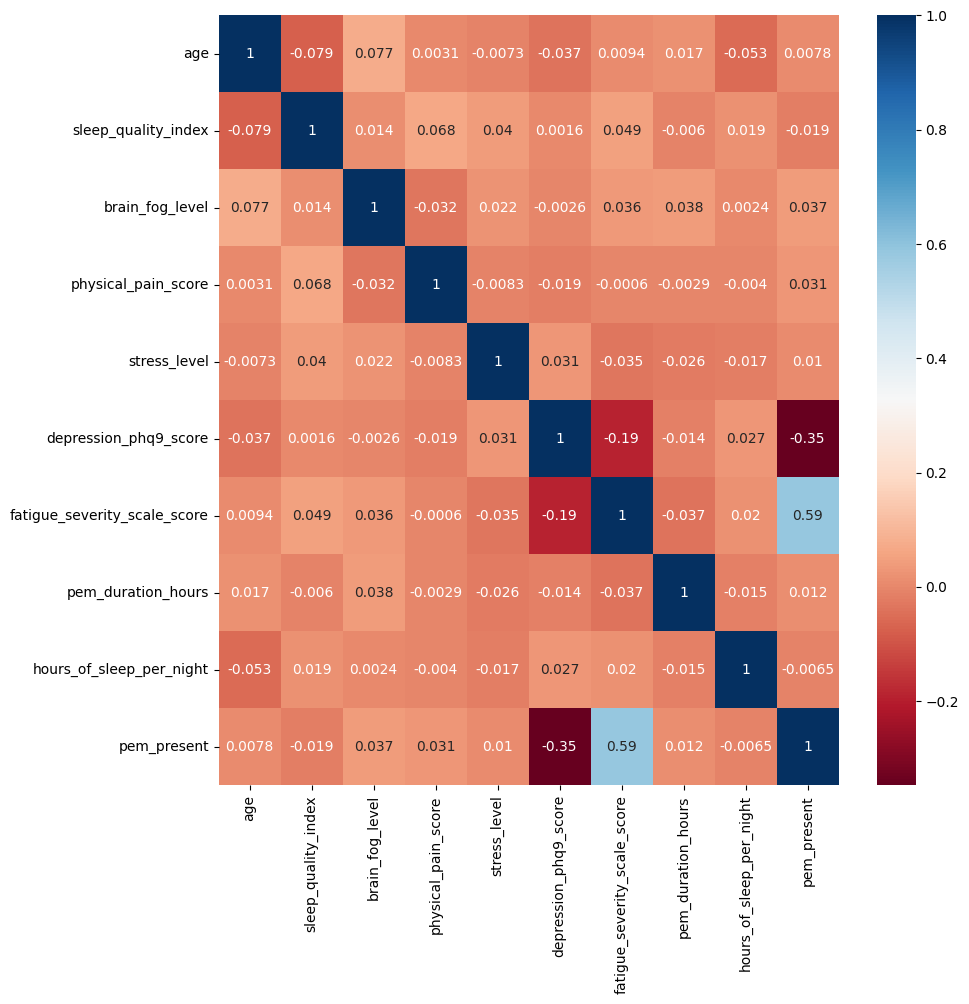

In [21]:
corr = df[num_cols].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

In [22]:
a1 = df[num_cols].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
age,18.0,18.00,18.000,19.000,20.0,45.000000,68.000,69.000,70.000,70.0,70.0
sleep_quality_index,1.0,1.10,1.200,1.300,1.5,5.468625,9.500,9.700,9.800,9.9,10.0
brain_fog_level,1.0,1.10,1.198,1.300,1.4,5.611765,9.600,9.800,9.802,9.9,10.0
physical_pain_score,1.0,1.10,1.100,1.200,1.4,5.521843,9.500,9.603,9.800,9.9,10.0
stress_level,1.0,1.10,1.200,1.297,1.5,5.459139,9.400,9.700,9.800,9.9,10.0
depression_phq9_score,0.0,0.99,1.000,2.000,3.0,10.000000,25.000,26.000,26.000,27.0,27.0
fatigue_severity_scale_score,0.0,0.30,0.500,0.700,1.1,7.000000,9.200,9.500,9.700,9.8,10.0
pem_duration_hours,0.0,0.00,0.000,1.000,2.0,23.000000,46.000,46.000,47.000,47.0,47.0
hours_of_sleep_per_night,3.0,3.10,3.100,3.200,3.3,6.585649,9.605,9.800,9.900,9.9,10.0
pem_present,0.0,0.00,0.000,0.000,0.0,1.000000,1.000,1.000,1.000,1.0,1.0


In [23]:
cat_cols

Index(['gender', 'work_status', 'social_activity_level', 'exercise_frequency',
       'meditation_or_mindfulness', 'diagnosis'],
      dtype='object')

In [25]:
df_dummies  = pd.get_dummies(data = df,columns = cat_cols[:-1:],drop_first=True,dtype=int)
print(df_dummies.shape)
print(df_dummies.columns)

(1000, 23)
Index(['age', 'sleep_quality_index', 'brain_fog_level', 'physical_pain_score',
       'stress_level', 'depression_phq9_score', 'fatigue_severity_scale_score',
       'pem_duration_hours', 'hours_of_sleep_per_night', 'pem_present',
       'diagnosis', 'gender_Male', 'work_status_Partially working',
       'work_status_Working', 'social_activity_level_Low',
       'social_activity_level_Medium', 'social_activity_level_Very high',
       'social_activity_level_Very low', 'exercise_frequency_Never',
       'exercise_frequency_Often', 'exercise_frequency_Rarely',
       'exercise_frequency_Sometimes', 'meditation_or_mindfulness_Yes'],
      dtype='object')


In [26]:
for i in cat_cols:
    print(df[i].value_counts())

gender
Male      524
Female    476
Name: count, dtype: int64
work_status
Partially working    352
Working              350
Not working          298
Name: count, dtype: int64
social_activity_level
Very low     222
High         221
Low          190
Very high    186
Medium       181
Name: count, dtype: int64
exercise_frequency
Rarely       228
Often        223
Daily        194
Sometimes    184
Never        171
Name: count, dtype: int64
meditation_or_mindfulness
Yes    510
No     490
Name: count, dtype: int64
diagnosis
Depression    401
ME/CFS        397
Both          202
Name: count, dtype: int64


In [29]:
# for i in cat_cols:
#     print(df_dummies[i].value_counts())

##### Select x and y

In [58]:
x = df_dummies.drop(['diagnosis'],axis=1)
y = df_dummies['diagnosis']
print(x.shape)
print(y.shape)

(1000, 22)
(1000,)


In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(800, 22) (200, 22)
(800,) (200,)


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [82]:
def eval_model(ytest,ypred):
  print(confusion_matrix(ytest,ypred))
  print(classification_report(ytest,ypred))

def train_test_score(model):
  print('Train Score',model.score(x_train,y_train))
  print('Test Score',model.score(x_test,y_test))

In [83]:
# LogReg
lr1 = LogisticRegression(max_iter=10000)
lr1.fit(x_train,y_train)
ypred_lr1 = lr1.predict(x_test)
train_test_score(lr1)
eval_model(y_test,ypred_lr1)

Train Score 0.99375
Test Score 0.985
[[45  0  0]
 [ 0 84  0]
 [ 3  0 68]]
              precision    recall  f1-score   support

        Both       0.94      1.00      0.97        45
  Depression       1.00      1.00      1.00        84
      ME/CFS       1.00      0.96      0.98        71

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



In [ ]:
### DTree

In [87]:

dt1 = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=7)
dt1.fit(x_train,y_train)
ypred_dt1 = dt1.predict(x_test)
train_test_score(dt1)
eval_model(y_test,ypred_dt1)

Train Score 0.995
Test Score 0.985
[[45  0  0]
 [ 0 84  0]
 [ 3  0 68]]
              precision    recall  f1-score   support

        Both       0.94      1.00      0.97        45
  Depression       1.00      1.00      1.00        84
      ME/CFS       1.00      0.96      0.98        71

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



In [92]:
### RForest
rf1 = RandomForestClassifier(n_estimators = 75, criterion='entropy',max_depth=10,min_samples_split=12)
rf1.fit(x_train,y_train)
ypred_rf1 = rf1.predict(x_test)
train_test_score(rf1)
eval_model(y_test,ypred_rf1)

Train Score 0.99375
Test Score 0.985
[[45  0  0]
 [ 0 84  0]
 [ 3  0 68]]
              precision    recall  f1-score   support

        Both       0.94      1.00      0.97        45
  Depression       1.00      1.00      1.00        84
      ME/CFS       1.00      0.96      0.98        71

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



In [93]:
import pickle

In [94]:
# wb = write binary
# rb = read binary
pickle.dump(lr1,open('/content/drive/MyDrive/PGA52/ML_Model_Deployment/ME_CFS_MultiClass_Classificatoin/lr1_ms_cfs.pkl','wb'))  #
pickle.dump(dt1,open('/content/drive/MyDrive/PGA52/ML_Model_Deployment/ME_CFS_MultiClass_Classificatoin/dt1_ms_cfs.pkl','wb'))
pickle.dump(rf1,open('/content/drive/MyDrive/PGA52/ML_Model_Deployment/ME_CFS_MultiClass_Classificatoin/rf1_ms_cfs.pkl','wb'))

In [1]:
cols = ['age', 'sleep_quality_index', 'brain_fog_level', 'physical_pain_score',
       'stress_level', 'depression_phq9_score', 'fatigue_severity_scale_score',
       'pem_duration_hours', 'hours_of_sleep_per_night', 'pem_present',
       'gender_Male', 'work_status_Partially working',
       'work_status_Working', 'social_activity_level_Low',
       'social_activity_level_Medium', 'social_activity_level_Very high',
       'social_activity_level_Very low', 'exercise_frequency_Never',
       'exercise_frequency_Often', 'exercise_frequency_Rarely',
       'exercise_frequency_Sometimes', 'meditation_or_mindfulness_Yes']

In [2]:
# * args
# ** kwrags - variable lenegth keyword argument

In [10]:
def fun1(**x):   # 
    print(x)

In [12]:
fun1(a=10,b=20,c=30,d=5,e=98)

{'a': 10, 'b': 20, 'c': 30, 'd': 5, 'e': 98}


In [13]:
fun1()

{}
